In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

In [ ]:
%cd keras-retinanet/
!pip install .

In [ ]:
!python setup.py build_ext --inplace

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib
import os
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
urllib.request.urlretrieve(
    'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5',
    'pretrained_model.h5')

In [ ]:
model = models.load_model('pretrained_model.h5')

In [9]:
class_names = [l.rstrip() for l in open('coco_categories.txt')]
class_names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [10]:
def show_image_with_predictions(img_path, threshold=0.6):
  im = np.array(Image.open(img_path))
  print("im.shape:", im.shape)

  # RGBA resim var ise (PNG)
  im = im[:,:,:3]

  # Retinanet paketinde tanımlı kodlar - resimi işlemeye hazır hale getiriyoruz
  imp = preprocess_image(im)
  imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(imp, axis=0)
  )

  # kutu koordinatlarını resim ile orantılı hale çevirme
  boxes /= scale

  # her tahmin için döngü
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # verdiğimiz sınırın altında kalanları elemek için
    if score < threshold:
      break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    #Sınıfları al
    class_name = class_names[label]
    caption = f"{class_name} {score:.3f}"
    draw_caption(im, box, caption)

  plt.axis('off')
  plt.imshow(im)
  plt.show()

In [11]:
plt.rcParams['figure.figsize'] = [20, 10]

im.shape: (900, 1200, 3)


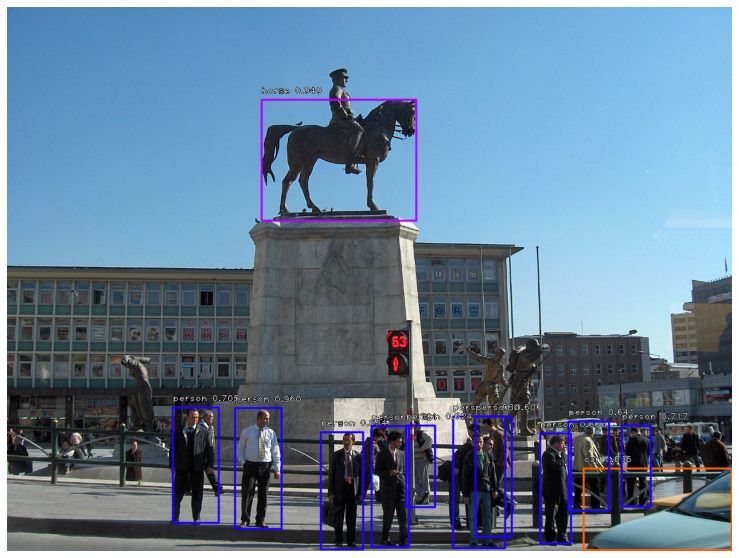

In [14]:
show_image_with_predictions('ulus.jpg', threshold=0.6)